In [1]:
import json 
from loki.loki import Loki
from loki.traveltimes import Traveltimes
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#work directory
db_path = '/home/emanuele/LOKI-DAS/tests/Test_1/Traveltimes'
hdr_filename = 'header_long.hdr'
geometry_filename = 'stations.dat'

## CREATE Traveltimes with NonLinLoc

In [3]:
#create traveltimes with NonLinLoc

#create the grid 
os.system("""
    /home/emanuele/LOKI-DAS/NLL5.00_bin_linux_64/bin/Vel2Grid /home/emanuele/LOKI-DAS/NLL_loki_requirements/TEST_NLL/das_p.run
""")
#traveltimes
os.system("""
    /home/emanuele/LOKI-DAS/NLL5.00_bin_linux_64/bin/Grid2Time /home/emanuele/LOKI-DAS/NLL_loki_requirements/TEST_NLL/das_p.run
""")


Vel2Grid (NonLinLoc v5.00.0 02Sep2008) 
Creating model grid files: /home/emanuele/LOKI-DAS/tests/Test_1/Traveltimes/das.P.mod.*
Grid2Time (NonLinLoc v5.00.0 02Sep2008) 

Calculating travel times for source: HM01  X 0.0000  Y 0.0000  Z 0.0000 ...
Source:  Velocity: 2.000000 km/sec  GridLoc: ix=0.000000 iy=0.000000 iz=0.000000
Finished calculation, time grid output files: /home/emanuele/LOKI-DAS/NLL_loki_requirements/TEST_NLL/Traveltimes/syn_das_prova_ema/das.P.HM01.*


0

## Load Traveltimes with Loki

In [4]:
#object

tt = Traveltimes(db_path, hdr_filename, geometry_filename)

print(tt)
print("All attributes and methods:", dir(tt))

All attributes and methods: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'apply_master_event_correction', 'db_path', 'db_stations', 'dtt', 'dttx', 'dttz', 'dx', 'dz', 'event_indexes', 'geometry_filename', 'hdr_filename', 'interpolation', 'lat0', 'load_header', 'load_station_info', 'load_traveltimes', 'lon0', 'nttx', 'nttz', 'nx', 'nyz', 'nz', 'ref_station_coordinates', 'refsta', 'save_ttdb', 'stations_coordinates', 'ttdb_generator', 'ttdb_reduce', 'x', 'x0', 'y', 'z', 'z0']


Grid dimensions (nx, nz): 1001, 301
Grid origin (x0, z0): 0.0, 0.0
Grid spacing (dx, dz): 0.1, 0.1
dtt: 0.1
ref x: [ 0.1  1.1  2.1  3.1  4.1  5.1  6.1  7.1  8.1  9.1 10.1 11.1 12.1 13.1
 14.1 15.1 16.1 17.1 18.1 19.1 20.1 21.1 22.1 23.1 24.1 25.1 26.1 27.1
 28.1 29.1 30.1 31.1 32.1 33.1 34.1 35.1 36.1 37.1 38.1 39.1 40.1 41.1
 42.1 43.1 44.1 45.1 46.1 47.1 48.1 49.1 50.1 51.1 52.1 53.1 54.1 55.1
 56.1 57.1 58.1 59.1 60.1 61.1 62.1 63.1 64.1 65.1 66.1 67.1 68.1 69.1
 70.1]
ref x: HM01
HM01: [ 0.        0.05      0.1      ... 21.70933  21.714407 21.719505]


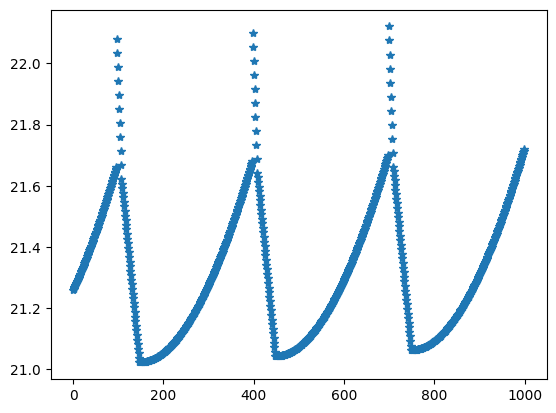

In [5]:
#object

tt = Traveltimes(db_path, hdr_filename, geometry_filename)

# Access loaded data
print(f"Grid dimensions (nx, nz): {tt.nx}, {tt.nz}")
print(f"Grid origin (x0, z0): {tt.x0}, {tt.z0}")
print(f"Grid spacing (dx, dz): {tt.dx}, {tt.dz}")
print(f"dtt: {tt.dtt}")
print(f"ref x: {tt.x}")
print(f"ref x: {tt.refsta}")


stations = tt.load_station_info()

time = tt.load_traveltimes('P', label='das', precision='single')


for key, value in time.items():
    print(f"{key}: {value}")
    plt.plot(value[len(value)-1000:len(value)], '*')




In [6]:
hdr_path = '/home/emanuele/LOKI-DAS/tests/Test_1/Traveltimes/das.P.HM01.time.hdr'
buf_path = '/home/emanuele/LOKI-DAS/tests/Test_1/Traveltimes/das.P.HM01.time.buf'

def read_hdr_file(header_path):
    """
    Reads the header (.hdr) file to extract metadata about the .buf file.

    Parameters:
        header_path (str): Path to the .hdr file.

    Returns:
        dict: Metadata including grid dimensions, spacings, and offsets.
    """
    metadata = {}
    with open(header_path, 'r') as hdr_file:
        lines = hdr_file.readlines()
        
        # Parse the first line for essential metadata
        first_line = lines[0].split()
        metadata['NX'] = int(first_line[1])  # Number of distances
        metadata['NY'] = int(first_line[2])  # Number of depths
        metadata['X0'] = float(first_line[3])  # Distance offset
        metadata['Y0'] = float(first_line[4])  # Depth offset
        metadata['Z0'] = float(first_line[5])  # Unused here but included in case
        metadata['DX'] = float(first_line[6])  # Distance spacing
        metadata['DY'] = float(first_line[7])  # Depth spacing

    print("Extracted Metadata:", metadata)  # Debug output
    return metadata

def read_buf_file(buf_path, metadata):
    """
    Reads the .buf file based on metadata from the .hdr file.

    Parameters:
        buf_path (str): Path to the .buf file.
        metadata (dict): Metadata extracted from the .hdr file.

    Returns:
        tuple: (travel_times, distances, depths)
            travel_times (2D numpy array): Travel times matrix with shape (NX, NY).
            distances (1D numpy array): Array of distances.
            depths (1D numpy array): Array of depths.
    """
    NX = metadata['NX']
    NY = metadata['NY']
    DX = metadata['DX']
    DY = metadata['DY']
    X0 = metadata['X0']
    Y0 = metadata['Y0']

    # Generate distance and depth arrays
    distances = X0 + np.arange(0, NX) * DX
    depths = Y0 + np.arange(0, NY) * DY

    # Read the binary data
    with open(buf_path, 'rb') as file:
        travel_times = np.fromfile(file, dtype=np.float32)

    # Reshape the 1D travel times array into a 2D matrix (NX x NY)
    travel_times = travel_times.reshape((NX, NY))

    return travel_times, distances, depths



# Read header to get metadata
metadata = read_hdr_file(hdr_path)

# Read the .buf file using the extracted metadata
travel_times, distances, depths = read_buf_file(buf_path, metadata)

# Print details
print("Travel Times Matrix Shape:", travel_times.shape)
print("Distances:", distances)
print("Depths:", depths)


Extracted Metadata: {'NX': 1001, 'NY': 301, 'X0': 0.0, 'Y0': 0.0, 'Z0': 0.0, 'DX': 0.1, 'DY': 0.1}
Travel Times Matrix Shape: (1001, 301)
Distances: [  0.    0.1   0.2 ...  99.8  99.9 100. ]
Depths: [ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10.  10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11.  11.1
 11.2 11.3 11.4 11.5 11.6 11.7 11.8 11.9 12.  12.1 12.2 12.3 12.4 12.5
 12.6 12.7 12.8 12.9 13.  13.1 13.2 13.3 13.4 13.5 13.6 13.7 13.8 13.9
 14.  14.1 14.2 14.3 14.4 14.5 14.6 14.7 14.8 14.9 15.  15.1 15.2 15.3
 15.4 15.5 15.6 15.7

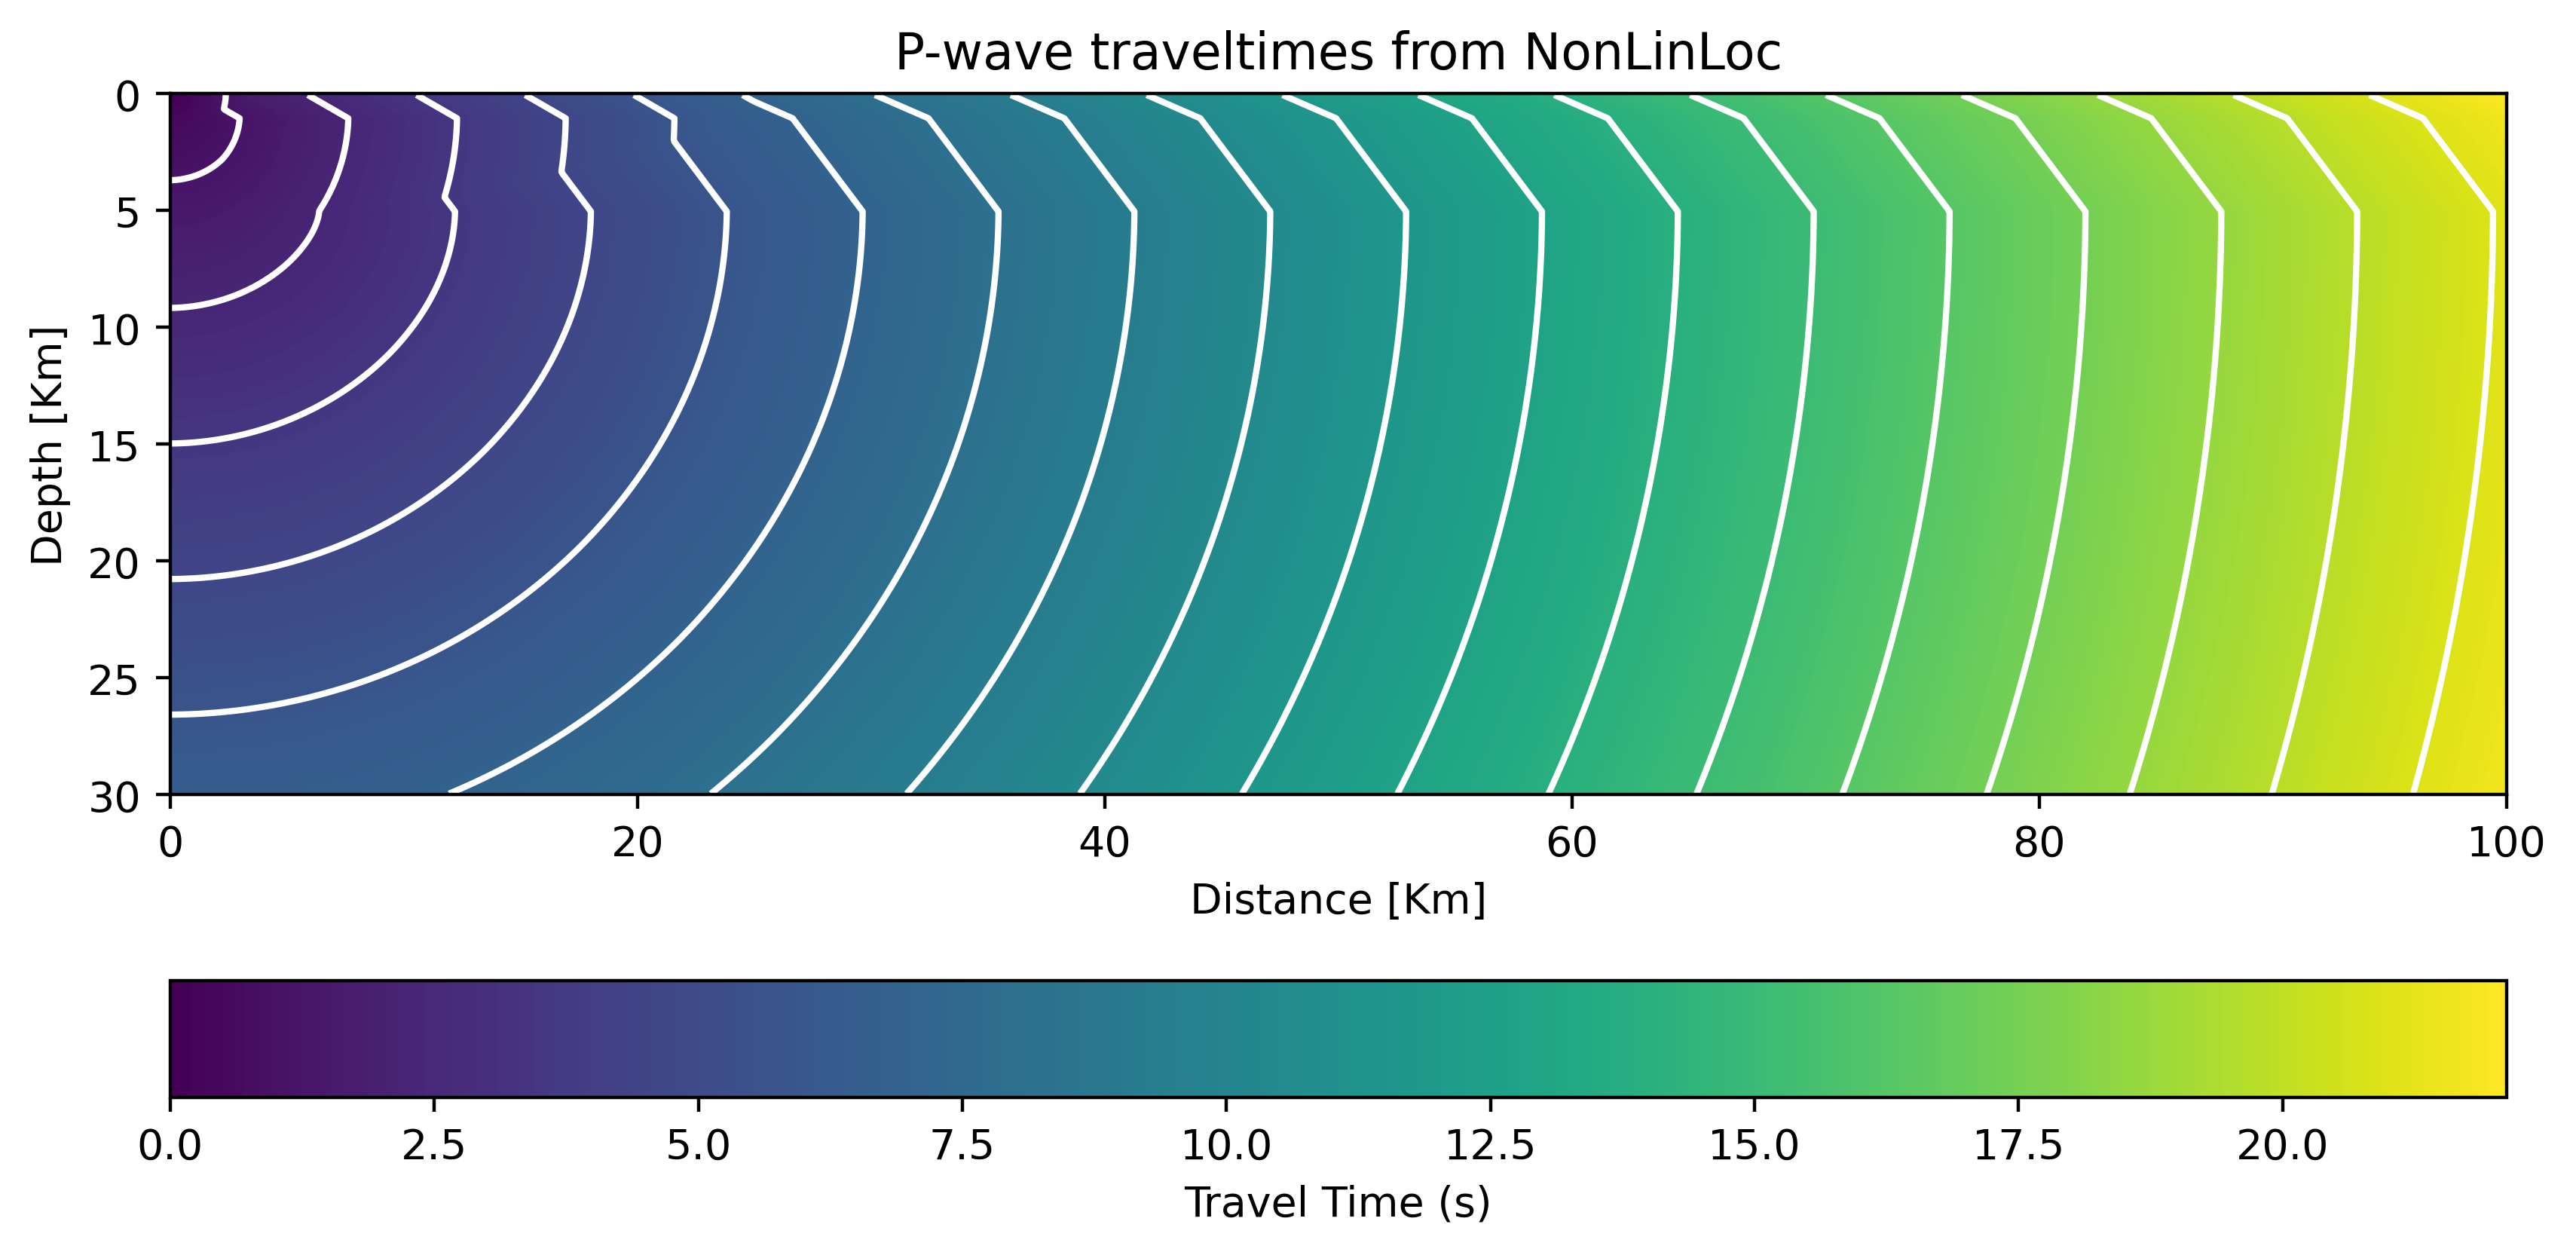

In [7]:


def plot_travel_times(travel_times, distances, depths):
    """
    Plots the 2D matrix of travel times with distance and depth, ensuring that low travel times (blue)
    are closer to the left side (low distances) of the plot.

    Parameters:
        travel_times (2D numpy array): Travel times matrix.
        distances (1D numpy array): Distance values.
        depths (1D numpy array): Depth values.
    """
    plt.figure(figsize=(10, 8), dpi= 400)

    # Flip the travel times vertically (along depth) but keep distances intact
    flipped_travel_times = np.flipud(travel_times.T)

    # Define the extent for the axes
    extent = [distances.min(), distances.max(), depths.min(), depths.max()]

    # Plot the heatmap
    im = plt.imshow(flipped_travel_times, extent=extent, origin='upper', aspect='equal', cmap='viridis')

    levels = np.linspace(flipped_travel_times.min(), flipped_travel_times.max(), 20)

# Adding contours on top of the image
    plt.contour(flipped_travel_times, levels=levels, extent=extent, origin='upper', colors='white')


    # Add a horizontal colorbar
    cbar = plt.colorbar(im, orientation='horizontal', pad=0.1)
    cbar.set_label('Travel Time (s)')

    # Place Y-axis ticks at the top and invert the depth axis
    plt.gca().xaxis.set_ticks_position('bottom')  # X ticks stay at the bottom
    plt.gca().yaxis.set_ticks_position('left')    # Y ticks stay on the left
    plt.gca().invert_yaxis()  # Invert Y-axis to make depth increase downward

    # Add labels and title
    plt.xlabel('Distance [Km]')
    plt.ylabel('Depth [Km]')
    plt.title('P-wave traveltimes from NonLinLoc')

    # Display the plot
    plt.show()

# Example usage
plot_travel_times(travel_times, distances, depths)
